# Dataset

In [43]:
import math

import torch
import pandas as pd
import numpy as np

In [44]:
from pathlib import Path

DATA_PATH = Path('data/')
DATA_PATH.mkdir(parents=True, exist_ok=True)

DATA_CACHE = Path('data/cache_dir/')
DATA_CACHE.mkdir(parents=True, exist_ok=True)

DATA_PATH_SAVE_MODELS = Path('data/models/')
DATA_PATH_SAVE_MODELS.mkdir(parents=True, exist_ok=True)

DATA_SYNTHETIC = Path('synthetic/')
DATA_SYNTHETIC.mkdir(parents=True, exist_ok=True)

pd.set_option('display.max_colwidth', 500) 

## [nanyy1025/covid_fake_news](https://huggingface.co/datasets/nanyy1025/covid_fake_news)

Датасет `nanyy1025/covid_fake_news` на Hugging Face содержит 10 700 записей, каждая из которых представляет собой твит, связанный с COVID-19, с меткой "real" (реальный) или "fake" (фейковый). Датасет разделен на три части: обучающая выборка (6 420 записей), валидационная выборка (2 140 записей) и тестовая выборка (2 140 записей). Данные представлены в формате CSV и предназначены для задач классификации текста и zero-shot классификации. Датасет был использован в исследовании "Fighting an Infodemic: COVID-19 Fake News Dataset" (arXiv:2011.03327). ([Hugging Face](https://huggingface.co/datasets/nanyy1025/covid_fake_news?utm_source=chatgpt.com)) 

```bibtex
@misc{patwa2020fighting,
title={Fighting an Infodemic: COVID-19 Fake News Dataset}, 
author={Parth Patwa and Shivam Sharma and Srinivas PYKL and Vineeth Guptha and Gitanjali Kumari and Md Shad Akhtar and Asif Ekbal and Amitava Das and Tanmoy Chakraborty},
year={2020},
eprint={2011.03327},
archivePrefix={arXiv},
primaryClass={cs.CL}
}
```

In [45]:
from datasets import load_dataset

In [46]:
def load_and_merge_nanyy1025_dataset(dataset_name: str = "nanyy1025/covid_fake_news",
                                     cache_dir=None) -> pd.DataFrame:
    dataset = load_dataset(dataset_name, cache_dir=cache_dir)

    train_df = dataset['train'].to_pandas()
    test_df = dataset['test'].to_pandas()
    validation_df = dataset['validation'].to_pandas()
    merged_df: pd.DataFrame = pd.concat([train_df, test_df, validation_df], ignore_index=True)
    merged_df.rename(columns={'tweet': 'text'}, inplace=True)
    return merged_df

nanyy1025_df = load_and_merge_nanyy1025_dataset( "nanyy1025/covid_fake_news", DATA_CACHE)

In [47]:
nanyy1025_df.head()

,id,text,label
0,1,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,real
1,2,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux,real
2,3,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ,real
4,5,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. https://t.co/1pYW6cWRaS,real


In [48]:
nanyy1025_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10700 non-null  int64 
 1   text    10700 non-null  object
 2   label   10700 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.9+ KB


## [justinqbui/covid_fact_checked_google_api](https://huggingface.co/datasets/justinqbui/covid_fact_checked_google_api)

Датасет **justinqbui/covid_fact_checked_google_api** с Hugging Face представляет собой выборку проверенных фактов, связанных с COVID-19, собранных с использованием Google Fact Checker API. Вот его основные характеристики:

1. **Общий объем данных:**
   - Содержит 3 043 записи.
   - Первоначально было собрано 10 000 фактов, но для упрощения включены только те записи, где рейтинг был представлен одним словом — "false" (ложь) или "true" (правда). Около 90% фактов в датасете оценены как ложные.

2. **Модальности и форматы:**
   - Тип данных: текст.
   - Формат: CSV.
   - Также доступен в формате Parquet.

3. **Описание данных:**
   - Поля датасета:
     - `text`: текст проверенного факта.
     - `label`: метка правдивости (`true` или `false`).
   - Аннотации созданы экспертами.
   - Язык: английский (en-US).
   - Датасет является монолингвальным.

In [49]:
def load_and_merge_justinqbui_dataset(dataset_name: str = "justinqbui/covid_fact_checked_google_api",
                                     cache_dir=None) -> pd.DataFrame:
    dataset = load_dataset(dataset_name, cache_dir=cache_dir)
    return dataset['train'].to_pandas()

justinqbui_1_df = load_and_merge_justinqbui_dataset( "justinqbui/covid_fact_checked_google_api", DATA_CACHE)

Repo card metadata block was not found. Setting CardData to empty.


In [50]:
justinqbui_1_df.head()

,Unnamed: 0,text,label
0,0,Study finds 5G technology a ‘significant factor’ in higher COVID case and death rates,False
1,1,"Society is “choosing blood clots and heart problems over cold and flu symptoms, or even no symptoms at all.”",False
2,2,"Dr. Anthony Fauci, the director of the National Institute of Allergy and Infectious Diseases (NIAID), has said he wants Americans to receive four COVID-19 vaccine shots each year.",False
3,3,"As of early December 2021, no one worldwide who tested positive for the omicron variant of the coronavirus had died.",True
4,4,the image shows a fence in a German mall separating people vaccinated against COVID-19 from those who are unvaccinated.,False


In [51]:
justinqbui_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3043 non-null   int64 
 1   text        3043 non-null   object
 2   label       3043 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 50.6+ KB


In [52]:
justinqbui_1_df['label'].value_counts()

label
False    2929
True      114
Name: count, dtype: int64

## [justinqbui/covid_fact_checked_polifact](https://huggingface.co/datasets/justinqbui/covid_fact_checked_polifact)

Датасет **justinqbui/covid_fact_checked_polifact** с Hugging Face включает записи, связанные с проверкой фактов о COVID-19, собранных с помощью автоматического веб-скрейпера, который извлек данные из PolitiFact COVID Fact Checker. Вот его ключевые характеристики:

1. **Общий объем данных:**
   - Содержит 1 190 записей.
   - Датасет состоит из утверждений и их оценки на правдивость.

2. **Модальности и форматы:**
   - Тип данных: текст.
   - Формат: CSV.
   - Также доступен в формате Parquet.

3. **Описание данных:**
   - Поля датасета:
     - `claim`: текст утверждения.
     - `rating`: оценка, присвоенная PolitiFact (7 значений: *half-true*, *full-flop*, *pants-fire*, *barely-true*, *true*, *mostly-true*, *false*).
     - `adjusted_rating`: упрощенная версия оценки (3 значения: например, "true", "false" и промежуточные варианты).
   - Поля предоставляют как детализированные, так и агрегированные оценки фактов.

In [53]:
justinqbui_2_df = load_and_merge_justinqbui_dataset( "justinqbui/covid_fact_checked_polifact", DATA_CACHE)

Repo card metadata block was not found. Setting CardData to empty.


In [54]:
justinqbui_2_df.head()

,Unnamed: 0,claim,rating,adjusted rating
0,0,"Deaths from vaccines have totaled 1,621 from Johnson & Johnson, 4,799 from Moderna, 13,039 from Pfizer and 73 from unknown vaccines. And this is an undercount because “only 1% of deaths are reported.”",false,false
1,1,The COVID-19 vaccine is the “deadliest vaccine ever made.”,pants-fire,false
2,2,Warnings about heart problems and blood clots in cold weather are to cover up COVID-19 vaccine side effects.,false,false
3,3,"""Canada joins the no jab, no food trend""",barely-true,misleading
4,4,"The COVID-19 vaccines ""suppress the immune system"" and make people more susceptible to HIV, shingles and herpes.",false,false


In [55]:
justinqbui_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1185 non-null   int64 
 1   claim            1185 non-null   object
 2   rating           1185 non-null   object
 3   adjusted rating  1185 non-null   object
dtypes: int64(1), object(3)
memory usage: 37.2+ KB


<Axes: >

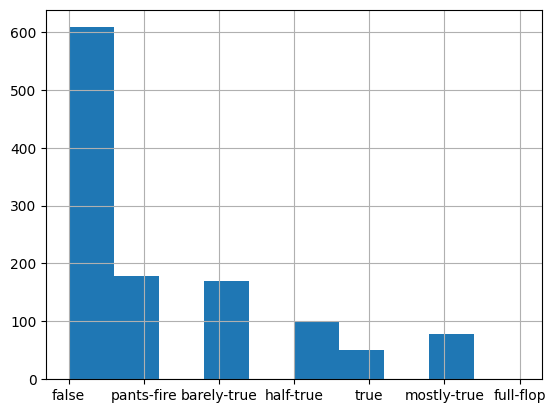

In [56]:
justinqbui_2_df['rating'].hist()

In [57]:
justinqbui_2_df['rating'].value_counts()

rating
false          608
pants-fire     178
barely-true    170
half-true      100
mostly-true     78
true            50
full-flop        1
Name: count, dtype: int64

In [58]:
justinqbui_2_df['adjusted rating'].value_counts()

adjusted rating
false         787
misleading    270
true          128
Name: count, dtype: int64

## Объединение

In [59]:
nanyy1025_df['source'] = 'nanyy1025'
nanyy1025_df['original_label_1'] = nanyy1025_df['label']
nanyy1025_df['label_idx'] = nanyy1025_df['label'].apply(lambda x: 1 if x == 'fake' else 0)
nanyy1025_df = nanyy1025_df[['text', 'label_idx', 'original_label_1', 'source']]
nanyy1025_df.head(1)

,text,label_idx,original_label_1,source
0,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,0,real,nanyy1025


In [60]:
justinqbui_1_df['source'] = 'justinqbui_1'
justinqbui_1_df['original_label_1'] = justinqbui_1_df['label']
justinqbui_1_df['label_idx'] = justinqbui_1_df['label'].apply(lambda x: True if x == False else 0).astype(int)
justinqbui_1_df = justinqbui_1_df[['text', 'label_idx', 'original_label_1', 'source']]
justinqbui_1_df.head(1)

,text,label_idx,original_label_1,source
0,Study finds 5G technology a ‘significant factor’ in higher COVID case and death rates,1,False,justinqbui_1


In [61]:
justinqbui_2_df['source'] = 'justinqbui_2'
justinqbui_2_df['original_label_1'] = justinqbui_2_df['rating']
justinqbui_2_df['original_label_2'] = justinqbui_2_df['adjusted rating']

justinqbui_2_df['label_idx'] = justinqbui_2_df['adjusted rating'].apply(lambda x: 1 if x == 'false' else 0)

justinqbui_2_df = justinqbui_2_df[['claim', 'label_idx', 'original_label_1', 'original_label_2', 'source']]
justinqbui_2_df.rename(columns={'claim': 'text'}, inplace=True)
justinqbui_2_df.head(1)

,text,label_idx,original_label_1,original_label_2,source
0,"Deaths from vaccines have totaled 1,621 from Johnson & Johnson, 4,799 from Moderna, 13,039 from Pfizer and 73 from unknown vaccines. And this is an undercount because “only 1% of deaths are reported.”",1,false,false,justinqbui_2


In [62]:
combined_df = pd.concat([nanyy1025_df, justinqbui_1_df, justinqbui_2_df], ignore_index=True)

In [63]:
combined_df.sample(5)

,text,label_idx,original_label_1,source,original_label_2
2376,Across five states this week we commenced the assessment of Public Health Emergency Operations Centres (PHEOC) for optimisation. We remain committed towards strengthening sub-national health security as well as capacity to manage disease outbreaks. https://t.co/R5N1MHNUng,0,real,nanyy1025,NaN
837,Video of a doctor fainted on the floor after getting infected with coronavirus.,1,fake,nanyy1025,NaN
11573,Herpes infection could be a rare side effect of COVID-19 vaccination,1,False,justinqbui_1,NaN
5178,With 57381 recoveries in the past 24 hours India records the biggest single-day spike in recoveries. Nation’s recovery rate from coronavirus infection stands at 71.17%. Bihar becomes 8th Indian state to cross the grim benchmark of 1 lakh COVID-19 cases #Indians #IndependenceDay https://t.co/ncHlbr8Bmk,1,fake,nanyy1025,NaN
9684,Update from the @minhealthnz ​ There is one new case of COVID-19 to report in managed isolation in New Zealand today.​ ​ The number of active cases in New Zealand is 22.​ It has been 78 days since the last case of COVID-19 was acquired locally from an unknown source.,0,real,nanyy1025,NaN


In [64]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14928 entries, 0 to 14927
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              14928 non-null  object
 1   label_idx         14928 non-null  int64 
 2   original_label_1  14928 non-null  object
 3   source            14928 non-null  object
 4   original_label_2  1185 non-null   object
dtypes: int64(1), object(4)
memory usage: 583.3+ KB


In [65]:
combined_df['original_label_1'].value_counts()

original_label_1
real           5600
fake           5100
False          2929
false           608
pants-fire      178
barely-true     170
True            114
half-true       100
mostly-true      78
true             50
full-flop         1
Name: count, dtype: int64

In [66]:
combined_df['label_idx'].value_counts()

label_idx
1    8816
0    6112
Name: count, dtype: int64

## Синтетика данных

In [67]:
negative_file = DATA_SYNTHETIC / 'negative_text.txt'
positive_file = DATA_SYNTHETIC / 'positive_text.txt'

def create_dataframe_from_file(file_path: Path, label_idx: int) -> pd.DataFrame:
    data = []
    with file_path.open('r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                data.append({'text': line, 'label_idx': label_idx})
    
    return pd.DataFrame(data)

negative_df = create_dataframe_from_file(negative_file, label_idx=1)
positive_df = create_dataframe_from_file(positive_file, label_idx=0)

synthetic_df = pd.concat([negative_df, positive_df], ignore_index=True)

In [68]:
synthetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1344 non-null   object
 1   label_idx  1344 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 21.1+ KB


In [69]:
synthetic_df.sample(5)

,text,label_idx
146,"Consuming spicy foods raises body temperature, which kills COVID-19 particles. The spicier the food, the better the protection.",1
1309,mRNA vaccines cannot alter your DNA.,0
956,"Side effects of COVID-19 vaccines are generally mild and short-lived. Common side effects include pain at the injection site, fatigue, and mild fever.",0
949,COVID-19 vaccines have undergone rigorous testing in clinical trials to ensure their safety and efficacy. They meet the standards set by the World Health Organization (WHO) and national regulatory agencies.,0
1080,"Vaccines do not cause autism—a claim that originated from a debunked study published in 1998. The study was retracted, and its author lost his medical license for misconduct. Numerous large-scale studies have found no link between vaccines and autism. Vaccines remain a critical tool for preventing life-threatening diseases.",0


## Комментарии

In [70]:
from datasets import load_dataset
import pandas as pd

def load_reddit_dataset(dataset_name="beenakurian/reddit_comments_subreddit_canada", cache_dir=None) -> pd.DataFrame:
    dataset = load_dataset(dataset_name, cache_dir=cache_dir)
    df = dataset['train'].to_pandas()
    df.rename(columns={'comment': 'text'}, inplace=True)    
    df['original_label_1'] = df['sentiment']
    df['label_idx'] = 2  
    df['source'] = 'reddit_canada'
    return df[['text', 'label_idx', 'original_label_1', 'source']]

def load_toxic_comments_dataset(dataset_name="AiresPucrs/toxic-comments", cache_dir=None) -> pd.DataFrame:
    dataset = load_dataset(dataset_name, cache_dir=cache_dir)
    df = dataset['train'].to_pandas()
    df.rename(columns={'comment_text': 'text'}, inplace=True)
    df['original_label_1'] = df['toxic']
    df['label_idx'] = 2
    df['source'] = 'toxic_comments'
    return df[['text', 'label_idx', 'original_label_1', 'source']]

def load_twitter_dataset(dataset_name="gxb912/large-twitter-tweets-sentiment", cache_dir=None) -> pd.DataFrame:
    dataset = load_dataset(dataset_name, cache_dir=cache_dir)
    df_train = dataset['train'].to_pandas()
    df_test = dataset['test'].to_pandas()
    df = pd.concat([df_train, df_test], ignore_index=True)  # Исправлено объединение
    df['original_label_1'] = df['sentiment']
    df['label_idx'] = 2  
    df['source'] = 'twitter'  # Исправлено название источника
    return df[['text', 'label_idx', 'original_label_1', 'source']]


## [https://huggingface.co/datasets/gxb912/large-twitter-tweets-sentiment?row=62](https://huggingface.co/datasets/gxb912/large-twitter-tweets-sentiment?row=62)

In [71]:
reddit_df = load_reddit_dataset(cache_dir=DATA_CACHE)
toxic_df = load_toxic_comments_dataset(cache_dir=DATA_CACHE)
twitter_df = load_twitter_dataset(cache_dir=DATA_CACHE)

In [72]:
# toxic_df_sample = toxic_df.sample(10000)

In [73]:
# toxic_df_sample.sample(5)

## Данные размеченные руками

In [74]:
import pandas as pd
from pathlib import Path

def load_and_process_data(file_path: Path) -> pd.DataFrame:
    """
    Загружает данные из Excel, добавляет дополнительные столбцы и возвращает обработанный DataFrame.
    Преобразует label_idx в int, а если возникают ошибки - ставит значение 2.

    :param file_path: Путь к файлу Excel.
    :return: Обработанный DataFrame.
    """
    data_marked_df = pd.read_excel(file_path).reset_index(drop=True)
    data_marked_df = data_marked_df.dropna(subset='new_label')
    
    # Копируем new_label в label_idx
    data_marked_df['label_idx'] = data_marked_df['new_label']
    
    # Пробуем привести к int, если ошибка (например, NaN или строка), ставим 2
    data_marked_df['label_idx'] = pd.to_numeric(data_marked_df['label_idx'], errors='coerce').fillna(2).astype(int)
    
    # Добавляем источник
    data_marked_df['source'] = 'handle_marked'

    return data_marked_df[['text', 'label_idx', 'source']]

In [75]:
# data_marked_df = load_and_process_data(DATA_PATH / 'data_marked_df.xlsx')

# Общий датафрейм

In [76]:
synthetic_df['source'] = 'synthetic'
final_df = pd.concat([combined_df, synthetic_df, reddit_df, toxic_df, twitter_df], ignore_index=True)
final_df["text"] = final_df["text"].replace("", None).drop_duplicates().fillna("")
final_df.to_excel(DATA_PATH / 'covid_vaccine_fake.xlsx', index=False)

In [77]:
idx2label = {
    0: "Real",
    1: "Fake",
    2: "Comments"
}

final_df['label_str'] = final_df['label_idx'].map(idx2label)

In [78]:
final_df['label_str'].value_counts()

label_str
Comments    302059
Fake          9665
Real          6607
Name: count, dtype: int64

In [79]:
final_df.sample(10)

,text,label_idx,original_label_1,source,original_label_2,label_str
6156,RT @PIB_India: India has 3102 cases per million population one of the lowest in the world. Tests per million population are also continuo…,0,real,nanyy1025,NaN,Real
255501,I need something to shrink these blemishes a tad...this is just ridiculous. I have one right smack in middle of my chin Feels like crying,2,0,twitter,NaN,Comments
251472,35 more minutes. I need a time machine! Waiting is not fun,2,0,twitter,NaN,Comments
290504,"@JotaC Thank you. I thought the pic looks a little dramatic. I think I look a little sad though, so I was thinking about changing it",2,1,twitter,NaN,Comments
48309,vandalism vandalism,2,1,toxic_comments,NaN,Comments
113265,back in the twitterverse after painful twitpocalypse experiences - iPhone still fekd though,2,1,twitter,NaN,Comments
174278,"@goatlady 28c up here...cloudless blue skies, tiny little breeze...perfect! You want to email a jacket to you?",2,1,twitter,NaN,Comments
269518,@BeckyC3 oh well. an extra one to watch sometime lol,2,0,twitter,NaN,Comments
202565,"So please don't wear masks, and tell as much people as you know",2,0,twitter,NaN,Comments
175404,@jewelgiroux awwwww well ::sigh:: I *guess* I would've had to give in to that too. @AbstractPoet I hope you got hero kisses.,2,1,twitter,NaN,Comments


In [81]:
import re

def clean_text(text):
    # text = re.sub(r'#\S+', '', text)  # Удаление хэштегов
    text = str(text)
    text = re.sub(r'@\S+', '', text)  # Удаление упоминаний
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Удаление ссылок
    return text.strip()  # Удаление лишних пробелов

final_df['text'] = final_df['text'].apply(clean_text)

In [82]:
final_df.sample(10)

,text,label_idx,original_label_1,source,original_label_2,label_str
31671,charmbracelet mariana mimi reverted addition charmbracelet disagree edit feel free discuss issue thank contributions talk,2,1,toxic_comments,NaN,Comments
229743,Great coffee from a fantastic little place in Petworth. Only downside: all the baked temptations on display,2,1,twitter,NaN,Comments
148994,this fellow wants some water fun too!! i told him that seriously 7k was too less to organize! he won't listen!,2,0,twitter,NaN,Comments
84024,limited time know heathen know finish,2,0,toxic_comments,NaN,Comments
107301,Glad Saturday is finally here! Looks like it's gonna be sunny too!,2,1,twitter,NaN,Comments
87447,nan,2,0,toxic_comments,NaN,Comments
136564,going back to work.,2,0,twitter,NaN,Comments
287145,lol i was away up the back there was a guy how laughed REALLY loud next to me so i missed some jokes but it was great lol,2,0,twitter,NaN,Comments
107202,Good morning !! or good afternoon relaxing time for you .,2,1,twitter,NaN,Comments
111735,aww that's horrible! xD,2,0,twitter,NaN,Comments


In [83]:
final_df.to_excel(DATA_PATH / 'covid_vaccine_fake_clear.xlsx', index=False)